In [1]:
import numpy as np
import skimage
import warnings
warnings.filterwarnings("ignore")

### Importing image and conversion from RGB to gray scale

In [2]:
# Load's the image in colour
image_color = skimage.io.imread('cavallo.jpg')
# Converts the image in b/w
X = skimage.color.rgb2gray(image_color)
print(f"Shape of the image: {X.shape}.")

Shape of the image: (546, 728).


### Showing the image in gray scale

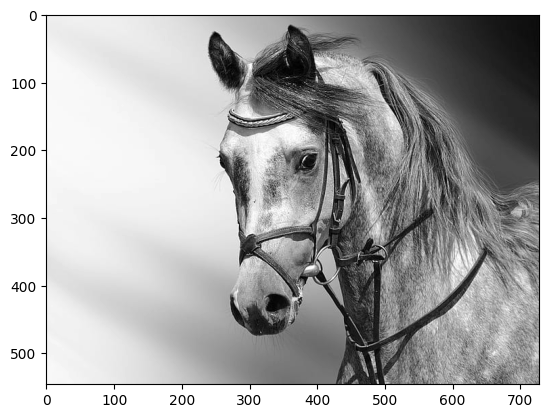

In [3]:
import matplotlib.pyplot as plt

plt.imshow(X, cmap="gray")
plt.show()

### Image SVD Decomposition

In [4]:
U, s, VT = np.linalg.svd(X)
print(U.shape,s.shape,VT.shape)
S = np.zeros(X.shape)
m, n = X.shape
r = np.minimum(m,n)
S[:r,:r] = np.diag(s)

(546, 546) (546,) (728, 728)


### Visualizing some dyad of the SVD decompositions

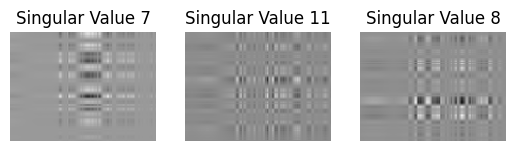

In [5]:
for i in range(3):
    k = np.random.randint(0,20)
    # Compute the dyad
    #dyad = sigma_i @ np.outer(ui, vi)
    dyad = U[:,k:k+1] @ S[k:k+1,k:k+1] @ VT[k:k+1,:]
    # Visualize the dyad
    plt.subplot(1, 3, i + 1)
    plt.imshow(dyad, cmap='gray')
    plt.title(f'Singular Value {k + 1}')
    plt.axis('off')

plt.show()

### Plot of singular values

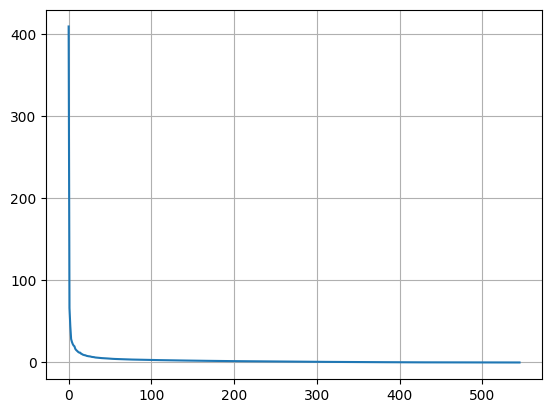

In [6]:
plt.plot(s)
plt.grid()
plt.show()

To notice that the first ones has higher values

### Plotting and computing the k-rank approximation for different values of k

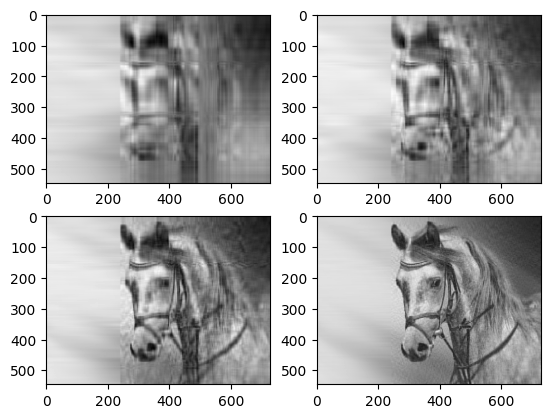

In [7]:
i = [5,10,20,50]
l = []
for k in range(len(i)):
    c = i[k]
    A = U[:,:c] @ S[:c,:c] @ VT[:c,:]
    l.append(np.linalg.norm(X-A,2))
    plt.subplot(2,2,k+1)
    plt.imshow(A,"gray")

### Plotting the approximation error for different k approximations of the original images

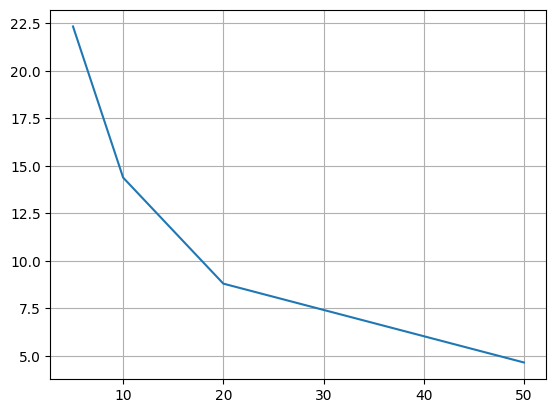

In [8]:
plt.plot(i,l)
plt.grid()
plt.show()

### Plotting of the compression factor for different k approximations of the original image

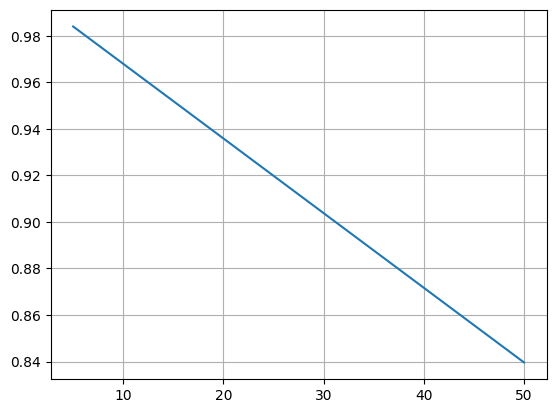

In [9]:
comp_factor = [(1-x*(m+n+1)/(m*n)) for x in i]
plt.plot(i,comp_factor)
plt.grid()
plt.show()

#### The K for which the compressed image requires the same amount of informations
#### The approximation error when the compressed image requires the same amount of      informations(K = kzero)

In [10]:
kzero=int(m*n/(m+n+1))
print(kzero)
A = U[:, :kzero] @ S[:kzero, :kzero] @ VT[:kzero, :]
print(np.linalg.norm(X-A,2))

311
0.7412536835674849


#### For k greater than kzero the memory required to store the approximated image is greater than the memory used by the original image